In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/johns_hopkins.csv')

In [ ]:
df.isnull().sum()

FIPS                   713
Admin2                 708
Province_State         170
Country_Region           0
Last_Update              0
Lat                     86
Long_                   86
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incident_Rate           86
Case_Fatality_Ratio     42
dtype: int64

In [ ]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3263.000000,3890.000000,3890.000000,3.976000e+03,3976.000000,3.976000e+03,3.974000e+03,3890.000000,3934.000000
mean,32405.273675,36.004323,-72.036928,1.885116e+04,418.039990,1.065141e+04,7.785483e+03,5068.469338,1.866230
std,18007.161500,12.968793,53.506558,9.537368e+04,2463.107477,7.468011e+04,5.361344e+04,2970.613637,3.444789
min,66.000000,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-9.537620e+05,0.000000,0.000000
25%,19052.000000,33.274355,-96.591968,6.007500e+02,8.000000,0.000000e+00,5.102500e+02,3026.553795,0.923976
50%,30069.000000,37.953523,-86.854220,1.673000e+03,26.000000,0.000000e+00,1.446000e+03,5002.575405,1.499238
75%,47040.000000,42.217931,-77.504500,6.738250e+03,98.250000,0.000000e+00,4.379750e+03,6823.747209,2.319401
max,99999.000000,71.706900,178.065000,2.426063e+06,59259.000000,1.774255e+06,2.208634e+06,24715.393499,180.959417


In [ ]:
df.dtypes

FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                 float64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object

In [ ]:
for column in list(df.columns):
  if df[column].isnull().sum()>(0.40*150):
    df.drop(columns=column, axis=1,inplace=True)
  elif df[column].isnull().sum():
    df[column].replace(np.nan,df[column].mean(),inplace=True)
  else:
    continue
df

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Combined_Key,Case_Fatality_Ratio
0,Afghanistan,2020-12-18 05:28:18,49378,2025,38505,8848.0,Afghanistan,4.101017
1,Albania,2020-12-18 05:28:18,51424,1055,26898,23471.0,Albania,2.051571
2,Algeria,2020-12-18 05:28:18,93933,2640,62089,29204.0,Algeria,2.810514
3,Andorra,2020-12-18 05:28:18,7466,79,6875,512.0,Andorra,1.058130
4,Angola,2020-12-18 05:28:18,16484,382,9266,6836.0,Angola,2.317399
...,...,...,...,...,...,...,...,...
3971,Vietnam,2020-12-18 05:28:18,1407,35,1263,109.0,Vietnam,2.487562
3972,West Bank and Gaza,2020-12-18 05:28:18,117755,1078,92979,23698.0,West Bank and Gaza,0.915460
3973,Yemen,2020-12-18 05:28:18,2087,606,1384,97.0,Yemen,29.036895
3974,Zambia,2020-12-18 05:28:18,18504,369,17680,455.0,Zambia,1.994163


In [ ]:
df.info()

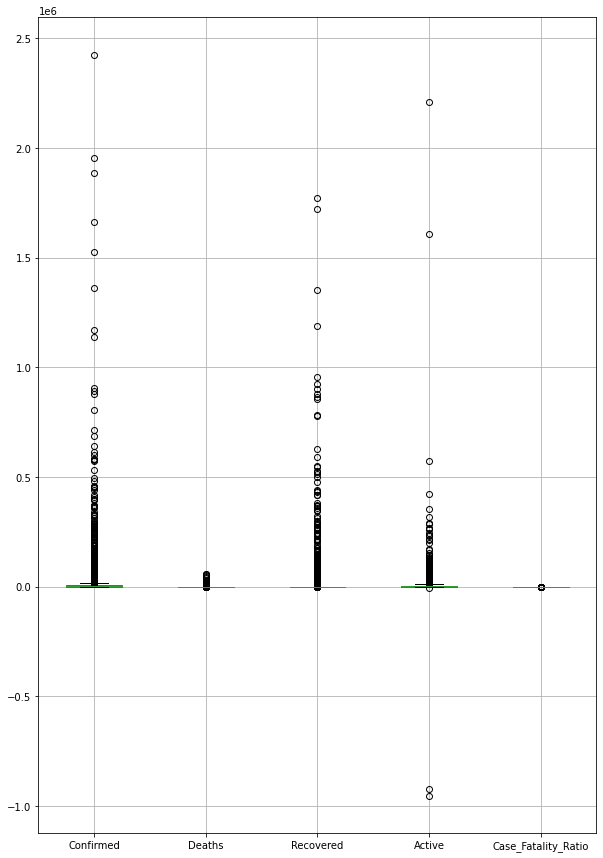

In [ ]:
df.boxplot(figsize=(10,15))

In [ ]:
q1 = df['Confirmed'].quantile(.25)
q3 = df['Confirmed'].quantile(.75)
IQR = q3-q1
df['Confirmed'] = np.clip(df['Confirmed'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = df['Deaths'].quantile(.25)
q3 = df['Deaths'].quantile(.75)
IQR = q3-q1
df['Deaths'] = np.clip(df['Deaths'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = df['Recovered'].quantile(.25)
q3 = df['Recovered'].quantile(.75)
IQR = q3-q1
df['Recovered'] = np.clip(df['Recovered'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = df['Active'].quantile(.25)
q3 = df['Active'].quantile(.75)
IQR = q3-q1
df['Active'] = np.clip(df['Active'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = df['Case_Fatality_Ratio'].quantile(.25)
q3 = df['Case_Fatality_Ratio'].quantile(.75)
IQR = q3-q1
df['Case_Fatality_Ratio'] = np.clip(df['Case_Fatality_Ratio'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
df.corr()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
Confirmed,1.000000,0.928205,0.263459,0.859099,0.100211
Deaths,0.928205,1.000000,0.260890,0.805485,0.297290
Recovered,0.263459,0.260890,1.000000,0.196947,0.036092
Active,0.859099,0.805485,0.196947,1.000000,0.075695
Case_Fatality_Ratio,0.100211,0.297290,0.036092,0.075695,1.000000


In [ ]:
df

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,15944.5,233.625,38505,8848.00
1,Albania,15944.5,233.625,26898,10215.75
2,Algeria,15944.5,233.625,62089,10215.75
3,Andorra,7466.0,79.000,6875,512.00
4,Angola,15944.5,233.625,9266,6836.00
...,...,...,...,...,...
3971,Vietnam,1407.0,35.000,1263,109.00
3972,West Bank and Gaza,15944.5,233.625,92979,10215.75
3973,Yemen,2087.0,233.625,1384,97.00
3974,Zambia,15944.5,233.625,17680,455.00


In [ ]:
df= df.drop(['Combined_Key'], axis=1)

In [ ]:
df= df.drop(['Last_Update'], axis=1)

In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio
count,3976.000000,3976.000000,3.976000e+03,3976.000000,3976.000000
mean,4609.044140,67.835670,1.065141e+04,3114.519735,1.704117
std,5680.986649,83.194773,7.468011e+04,3544.805161,1.105715
min,0.000000,0.000000,0.000000e+00,-5312.250000,0.000000
25%,600.750000,8.000000,0.000000e+00,510.750000,0.928568
50%,1673.000000,26.000000,0.000000e+00,1447.500000,1.509251
75%,6738.250000,98.250000,0.000000e+00,4392.750000,2.297877
max,15944.500000,233.625000,1.774255e+06,10215.750000,4.351840


In [ ]:
df= df.drop(['Case_Fatality_Ratio'], axis=1)

In [ ]:
df.corr()

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.928205,0.263459,0.859099
Deaths,0.928205,1.000000,0.260890,0.805485
Recovered,0.263459,0.260890,1.000000,0.196947
Active,0.859099,0.805485,0.196947,1.000000


In [ ]:
df

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,15944.5,233.625,38505,8848.00
1,Albania,15944.5,233.625,26898,10215.75
2,Algeria,15944.5,233.625,62089,10215.75
3,Andorra,7466.0,79.000,6875,512.00
4,Angola,15944.5,233.625,9266,6836.00
...,...,...,...,...,...
3971,Vietnam,1407.0,35.000,1263,109.00
3972,West Bank and Gaza,15944.5,233.625,92979,10215.75
3973,Yemen,2087.0,233.625,1384,97.00
3974,Zambia,15944.5,233.625,17680,455.00


In [ ]:
print('Country with most Covid cases:',df['Country_Region'].value_counts().index[0])

Country with most Covid cases: US


In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(df['Country_Region'].value_counts()[:10].index,df['Country_Region'].value_counts()[:10].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country_Region']=le.fit_transform(df['Country_Region'])
print(df.head())
print(df['Country_Region'].unique())

   Country_Region  Confirmed   Deaths  Recovered    Active
0               0    15944.5  233.625      38505   8848.00
1               1    15944.5  233.625      26898  10215.75
2               2    15944.5  233.625      62089  10215.75
3               3     7466.0   79.000       6875    512.00
4               4    15944.5  233.625       9266   6836.00
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 1

In [ ]:
X=df.drop(['Recovered'],axis=1)
Y=df['Recovered']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applyting Logistic regression

In [ ]:
#call the model
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()
#Fit the model
clf = lr_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
#print(y_predicted)
print('Accuracy with LR:', accuracy_score(Y_test, y_predicted))
print('f1_score with LR:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with LR:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with LR:', precision_score(Y_test, y_predicted, average = 'macro'))

Accuracy with LR: 0.8454773869346733
f1_score with LR: 0.007131881523870079
recall_score with LR: 0.0073964171887020555
precision_score with LR: 0.006885614896664621


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

Applying Decision Tree

In [ ]:
#call the model
from sklearn.tree import DecisionTreeClassifier
lr_model= DecisionTreeClassifier(criterion="gini", max_depth=3)
#Fit the model
clf = lr_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
#print(y_predicted)
print('Accuracy with DT:', accuracy_score(Y_test, y_predicted))
print('f1_score with DT:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with DT:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with DT:', precision_score(Y_test, y_predicted, average = 'macro'))

Accuracy with DT: 0.8442211055276382
f1_score with DT: 0.007837100272899028
recall_score with DT: 0.008040585814109314
precision_score with DT: 0.007643659857136357


Applying Random Forest

In [ ]:
#call the model
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(criterion="gini", max_depth=3)
#Fit the model
clf = rf_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
#print(y_predicted)
print('Accuracy with RF:', accuracy_score(Y_test, y_predicted))
print('f1_score with RF:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with RF:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with RF:', precision_score(Y_test, y_predicted, average = 'macro'))

Accuracy with RF: 0.8467336683417085
f1_score with RF: 0.007516449202631872
recall_score with RF: 0.00819672131147541
precision_score with RF: 0.006940439904440233


Applying SVM

In [ ]:
from sklearn import svm
#calling the model
clf= svm.SVC(kernel='rbf', degree=2)
#fitting the model
clf.fit(X_train,Y_train)
#Predicct the model
#y_predicted= clf.predict(X_test)
#y_predicted_train= clf.predict(X_train)
#print(y_predicted)
#print(y_predicted_train)
print('Accuracy with svm:', accuracy_score(Y_test, y_predicted))
print('f1_score with svm:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with svm:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with svm:', precision_score(Y_test, y_predicted, average = 'macro'))


Accuracy with svm: 0.8467336683417085
f1_score with svm: 0.007512762779499298
recall_score with svm: 0.008064516129032258
precision_score with svm: 0.00703167383048867


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')  # here k=3
model.fit(X_train,Y_train)

#y_predicted = model.predict(X_test)
#y_predicted_train = model.predict(X_train)
print('Accuracy with knn:', accuracy_score(Y_test, y_predicted))
print('f1_score with knn:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with knn:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with knn:', precision_score(Y_test, y_predicted, average = 'macro'))

Accuracy with knn: 0.8442211055276382
f1_score with knn: 0.005158437730287398
recall_score with knn: 0.0051928783382789315
precision_score with knn: 0.005124450951683748


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Applying Naive Baye's

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
#y_predicted = gnb.predict(X_test)
#y_predicted_train = gnb.predict(X_train)

print('Accuracy with NB:', accuracy_score(Y_test, y_predicted))
print('f1_score with NB:', f1_score(Y_test, y_predicted, average = 'macro'))
print('recall_score with NB:', recall_score(Y_test, y_predicted, average = 'macro'))
print('precision_score with NB:', precision_score(Y_test, y_predicted, average = 'macro'))

Accuracy with NB: 0.8442211055276382
f1_score with NB: 0.005158437730287398
recall_score with NB: 0.0051928783382789315
precision_score with NB: 0.005124450951683748


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
for name,model in models:
  kfold=KFold(n_splits=10,random_state=7)
  cross_val_sc=cross_val_score(model,X,Y,scoring='accuracy',cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : acc: 0.8492158525625608(standard deviation: 0.2984826396720027)
decision tree : acc: 0.8514771590952244(standard deviation: 0.2923679986441104)
svm : acc: 0.8524821842208524(standard deviation: 0.2896599469567815)
knn : acc: 0.8519790387706797(standard deviation: 0.2902091469691333)
naive bayes : acc: 0.7858359809121173(standard deviation: 0.28445824521243634)
Random Forest : acc: 0.8517284153766314(standard deviation: 0.2916904209752383)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(10)
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7)
model_dt = DecisionTreeClassifier()
model_lr = LogisticRegression()
model_svc = SVC(gamma='auto')
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()

score=cross_val_score(model_rf, X_train, Y_train, cv=cv)
print(f'score of random forest classifier:{score.mean()}')
score=cross_val_score(model_dt, X_train, Y_train, cv=cv)
print(f'score of decision tree classifier:{score.mean()}')
score=cross_val_score(model_lr, X_train, Y_train, cv=cv)
print(f'score of logistic regression classifier:{score.mean()}')
score=cross_val_score(model_svc, X_train, Y_train, cv=cv)
print(f'score of SV classifier:{score.mean()}')
score=cross_val_score(model_knn, X_train, Y_train, cv=cv)
print(f'score of KNN classifier:{score.mean()}')
score=cross_val_score(model_nb, X_train, Y_train, cv=cv)
print(f'score of Naive Baye classifier:{score.mean()}')

score of random forest classifier:0.8537735849056605
score of decision tree classifier:0.8528301886792453
score of logistic regression classifier:0.8531446540880504
score of SV classifier:0.8537735849056605
score of KNN classifier:0.8531446540880502
score of Naive Baye classifier:0.8


Find the 10 best features from the random forest model
Create new dataframe with the 10 best features
Perform K-Fold cross validation on the new dataset with reduced features
Compare the score with previous K-fold cross validation

In [ ]:
#importing necessary packages
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn import tree

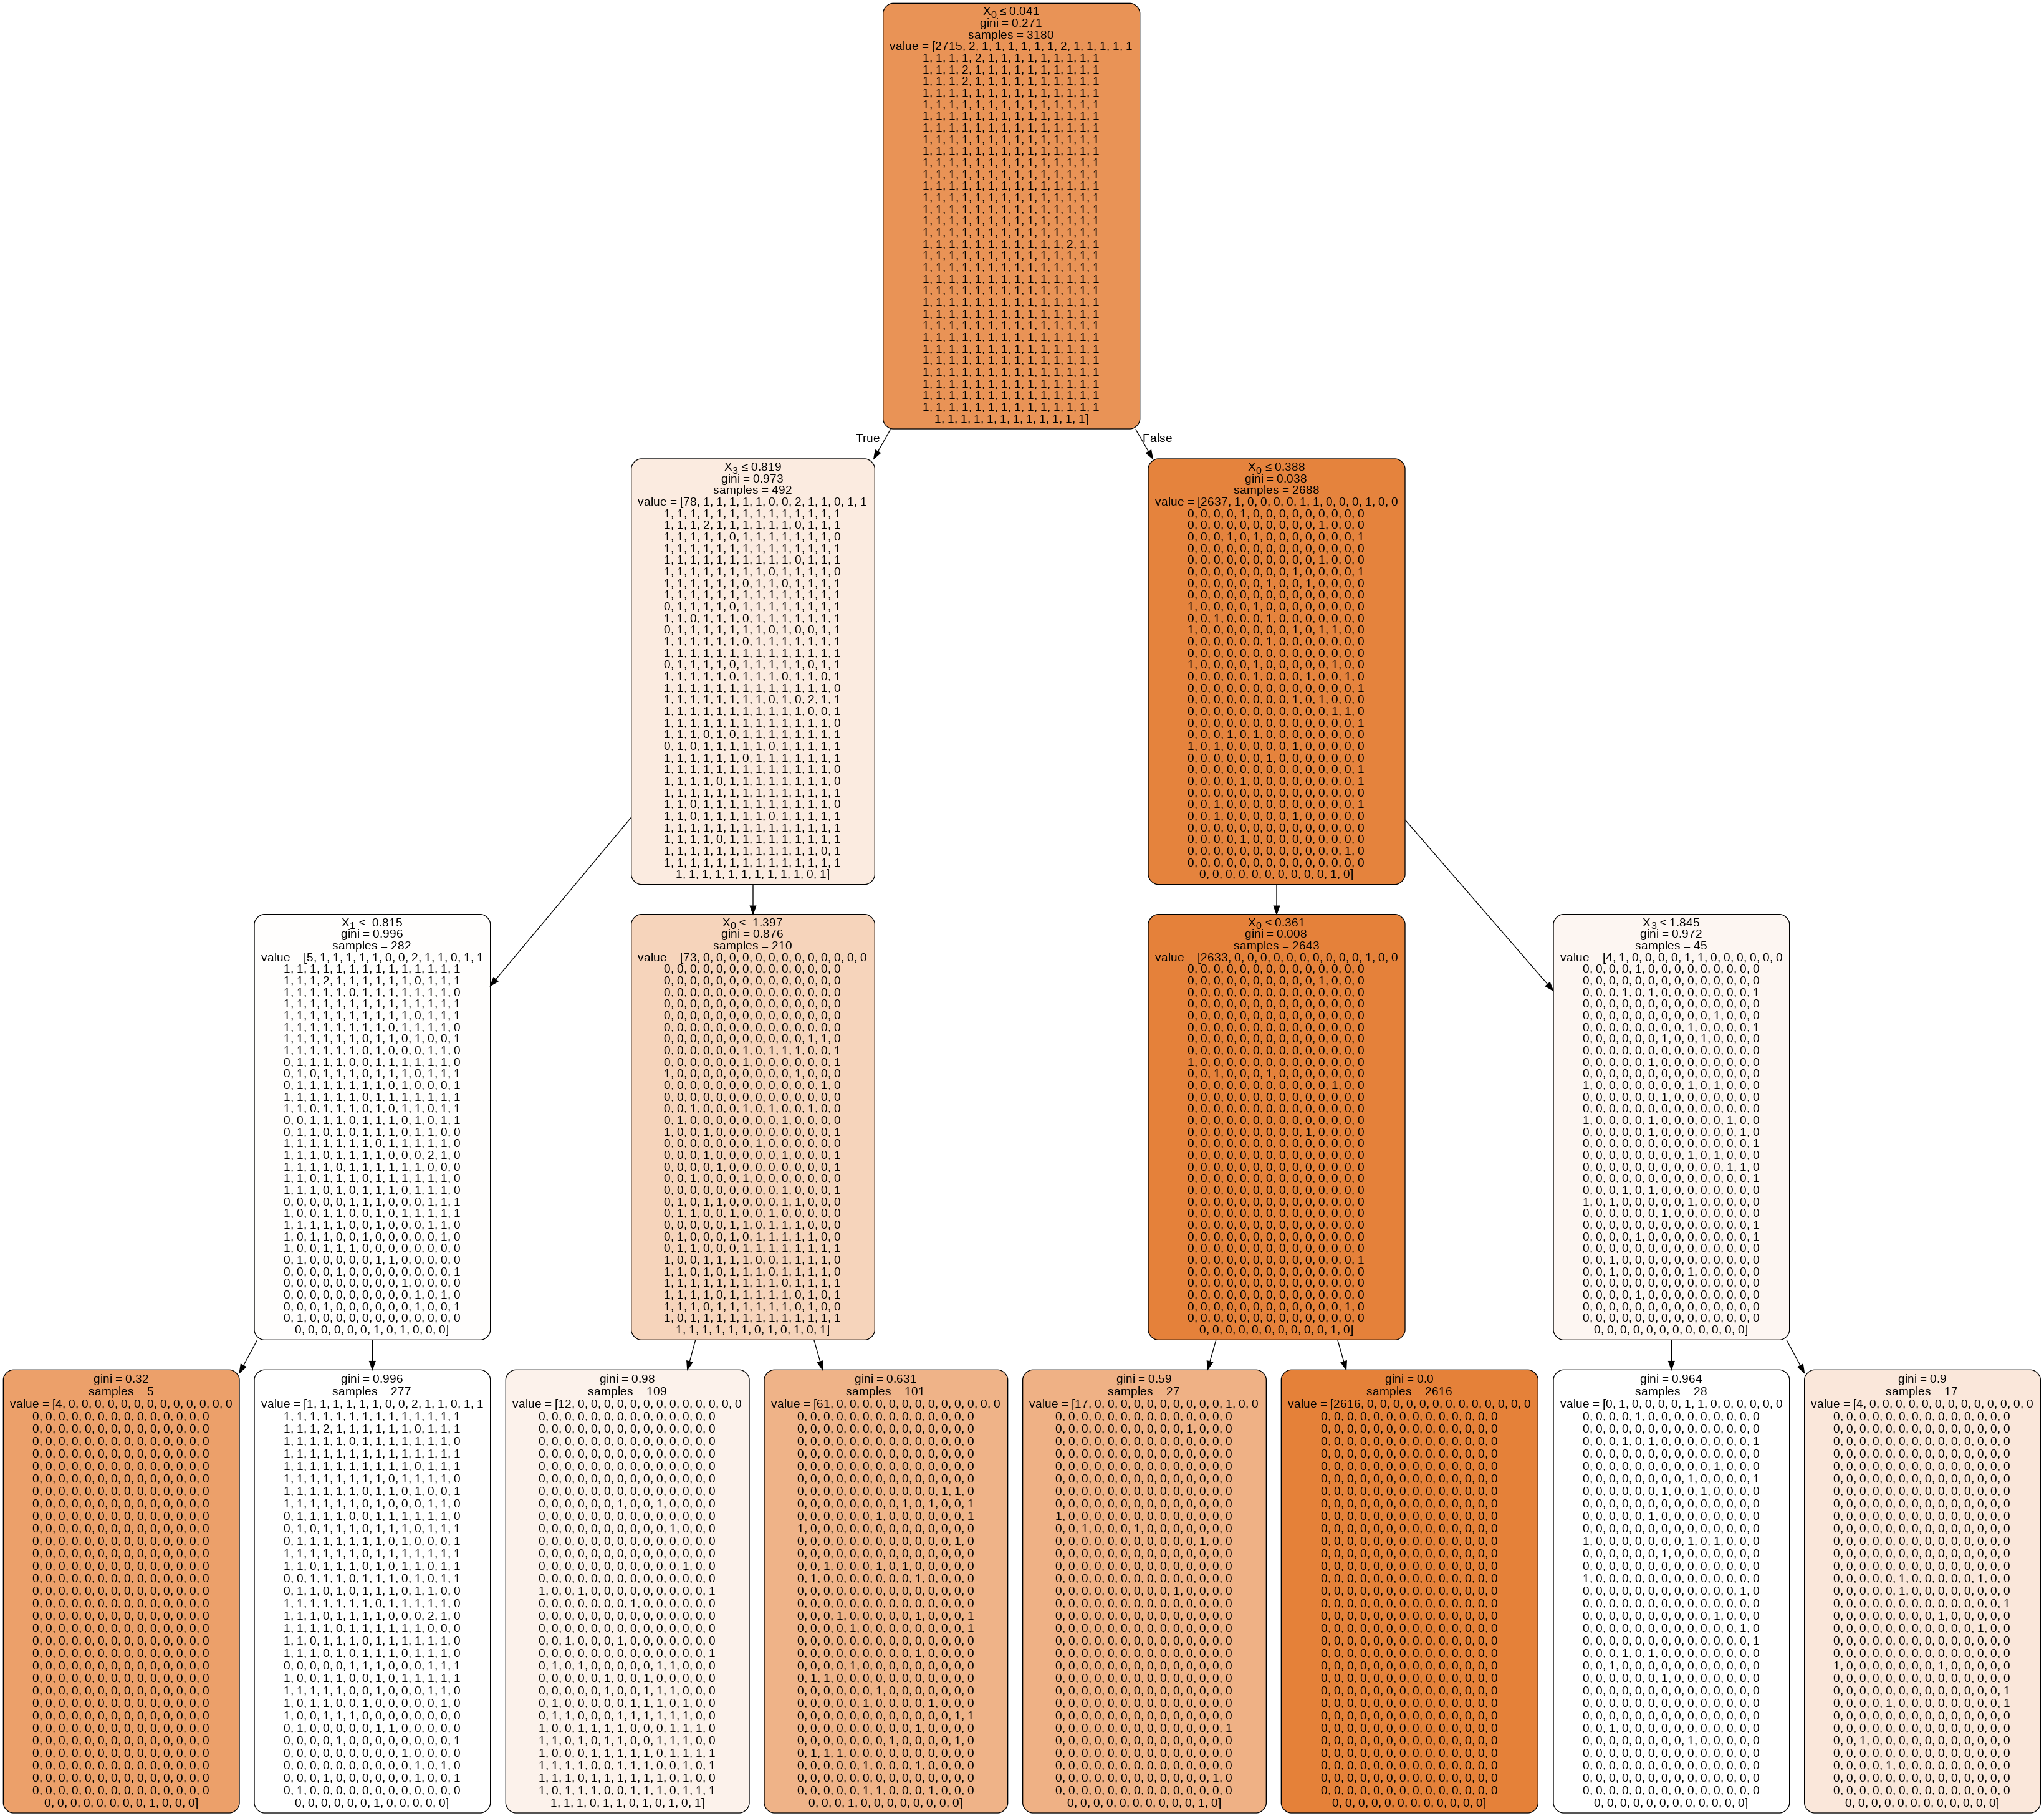

In [ ]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=None,  
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())